# mor

,importance
Al2O3/SiO2,264.121833
H2O/SiO2,36.476002
NaOH/SiO2,314.429343
KOH/SiO2,668.356376
CsOH/SiO2,0.000000
temperature,315.031069
time,39.070478


,false,mor
false,329,0
mor,0,54


,false,mor
false,139,3
mor,1,22


正解率(Accuracy) : 訓練 1.0, 検証 0.9757575757575757
適合率(Precision) : 訓練 1.0, 検証 0.88
再現率(Recall) : 訓練 1.0, 検証 0.9565217391304348
F1スコア : 訓練 1.0, 検証 0.9166666666666666


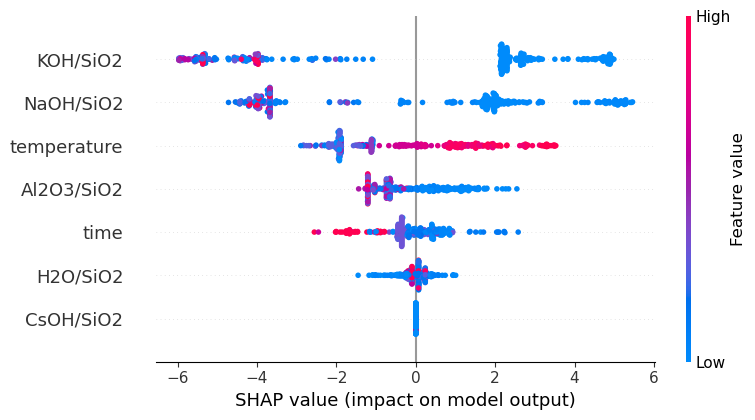

In [3]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 9]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="mor")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="mor")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="mor")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="mor")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="mor")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="mor")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# jbw

,importance
Al2O3/SiO2,150.359790
H2O/SiO2,118.451920
NaOH/SiO2,80.737443
KOH/SiO2,111.656237
CsOH/SiO2,0.000000
temperature,260.664119
time,21.252735


,false,jbw
false,394,0
jbw,0,17


,false,jbw
false,131,0
jbw,0,6


正解率(Accuracy) : 訓練 1.0, 検証 1.0
適合率(Precision) : 訓練 1.0, 検証 1.0
再現率(Recall) : 訓練 1.0, 検証 1.0
F1スコア : 訓練 1.0, 検証 1.0


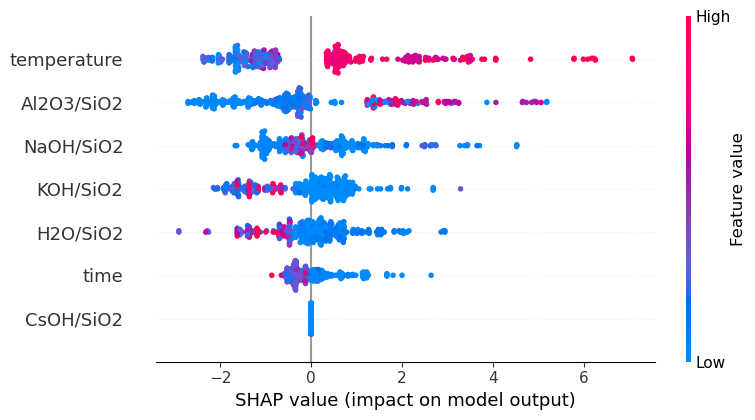

In [5]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 10]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="jbw")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="jbw")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="jbw")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="jbw")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="jbw")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="jbw")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK


# d6r

,importance
Al2O3/SiO2,440.543704
H2O/SiO2,536.475182
NaOH/SiO2,163.971242
KOH/SiO2,696.251262
CsOH/SiO2,0.000000
temperature,511.072284
time,194.120753


,d6r,false
d6r,135,1
false,2,273


,d6r,false
d6r,36,10
false,11,80


正解率(Accuracy) : 訓練 0.9927007299270073, 検証 0.8467153284671532
適合率(Precision) : 訓練 0.9854014598540146, 検証 0.7659574468085106
再現率(Recall) : 訓練 0.9926470588235294, 検証 0.782608695652174
F1スコア : 訓練 0.989010989010989, 検証 0.7741935483870968


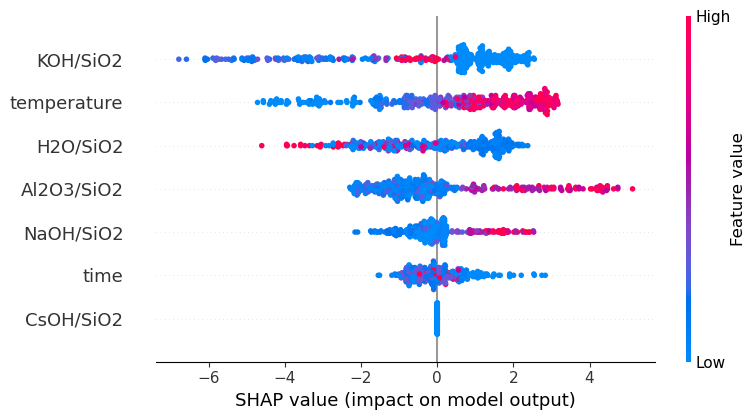

In [2]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 11]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="d6r")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="d6r")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="d6r")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="d6r")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="d6r")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="d6r")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK


# d8r

,importance
Al2O3/SiO2,401.062307
H2O/SiO2,214.830866
NaOH/SiO2,47.600185
KOH/SiO2,515.787120
CsOH/SiO2,0.000000
temperature,125.309259
time,98.611177


,d8r,false
d8r,43,0
false,0,340


,d8r,false
d8r,12,6
false,2,145


正解率(Accuracy) : 訓練 1.0, 検証 0.9515151515151515
適合率(Precision) : 訓練 1.0, 検証 0.8571428571428571
再現率(Recall) : 訓練 1.0, 検証 0.6666666666666666
F1スコア : 訓練 1.0, 検証 0.75


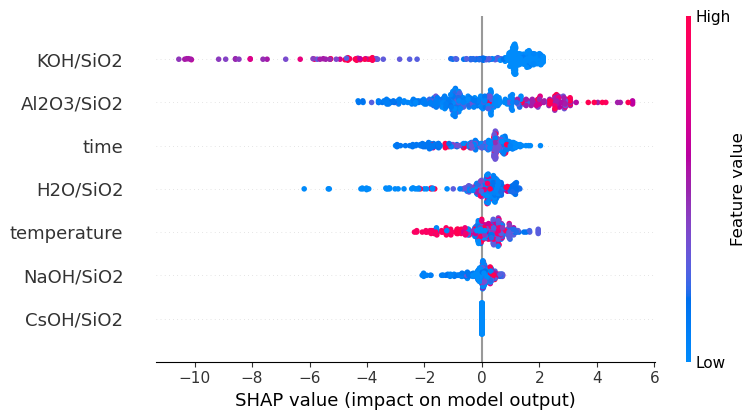

In [6]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 12]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="d8r")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="d8r")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="d8r")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="d8r")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="d8r")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="d8r")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK

# can

,importance
Al2O3/SiO2,338.530735
H2O/SiO2,273.599199
NaOH/SiO2,162.014300
KOH/SiO2,563.770424
CsOH/SiO2,0.000000
temperature,313.310167
time,326.816022


,can,false
can,77,1
false,0,305


,can,false
can,30,3
false,7,125


正解率(Accuracy) : 訓練 0.9973890339425587, 検証 0.9393939393939394
適合率(Precision) : 訓練 1.0, 検証 0.8108108108108109
再現率(Recall) : 訓練 0.9871794871794872, 検証 0.9090909090909091
F1スコア : 訓練 0.9935483870967742, 検証 0.8571428571428571


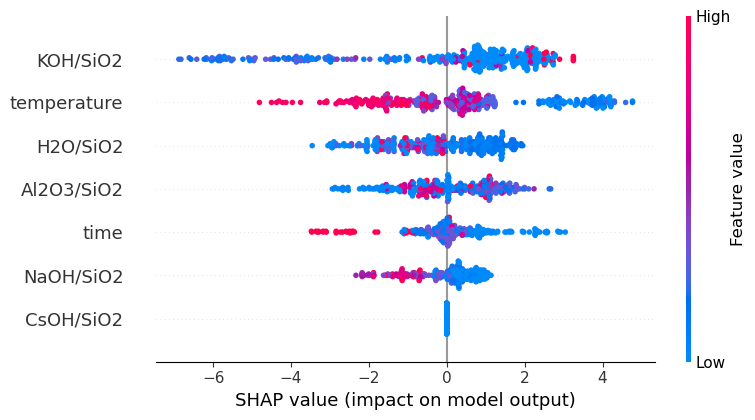

In [7]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 13]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="can")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="can")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="can")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="can")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="can")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="can")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK


# sod

,importance
Al2O3/SiO2,184.313766
H2O/SiO2,118.998734
NaOH/SiO2,732.492744
KOH/SiO2,85.079167
CsOH/SiO2,0.000000
temperature,1121.821556
time,104.708127


,false,sod
false,277,0
sod,1,105


,false,sod
false,117,3
sod,3,42


正解率(Accuracy) : 訓練 0.9973890339425587, 検証 0.9636363636363636
適合率(Precision) : 訓練 1.0, 検証 0.9333333333333333
再現率(Recall) : 訓練 0.9905660377358491, 検証 0.9333333333333333
F1スコア : 訓練 0.995260663507109, 検証 0.9333333333333333


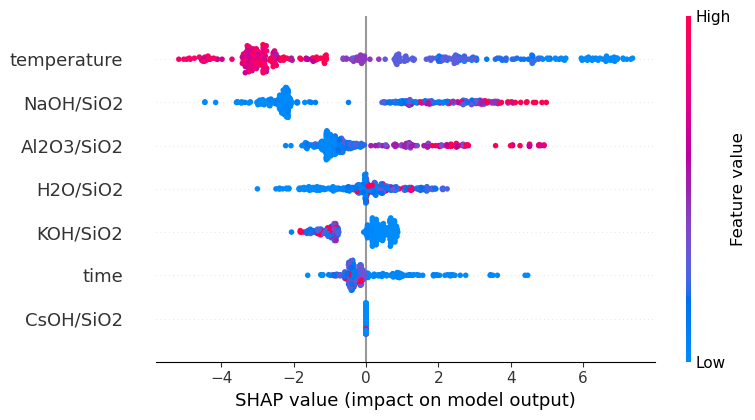

In [8]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 14]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="sod")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="sod")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="sod")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="sod")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="sod")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="sod")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK


# lta

,importance
Al2O3/SiO2,297.505192
H2O/SiO2,281.926465
NaOH/SiO2,282.651669
KOH/SiO2,40.685818
CsOH/SiO2,0.000000
temperature,616.095338
time,92.520521


,false,lta
false,327,0
lta,0,56


,false,lta
false,140,1
lta,10,14


正解率(Accuracy) : 訓練 1.0, 検証 0.9333333333333333
適合率(Precision) : 訓練 1.0, 検証 0.9333333333333333
再現率(Recall) : 訓練 1.0, 検証 0.5833333333333334
F1スコア : 訓練 1.0, 検証 0.717948717948718


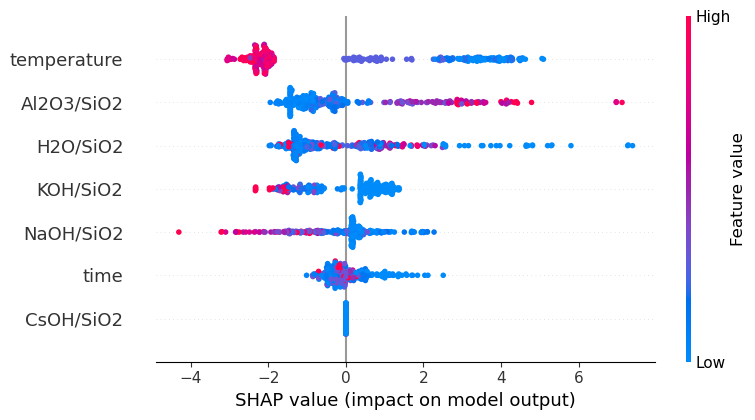

In [9]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 15]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="lta")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="lta")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="lta")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="lta")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="lta")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="lta")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK


# 4

,importance
Al2O3/SiO2,444.929478
H2O/SiO2,392.390445
NaOH/SiO2,599.630681
KOH/SiO2,441.403531
CsOH/SiO2,0.000000
temperature,399.735595
time,268.546383


,4,false
4,219,1
false,3,160


,4,false
4,90,5
false,9,61


正解率(Accuracy) : 訓練 0.9895561357702349, 検証 0.9151515151515152
適合率(Precision) : 訓練 0.9864864864864865, 検証 0.9090909090909091
再現率(Recall) : 訓練 0.9954545454545455, 検証 0.9473684210526315
F1スコア : 訓練 0.9909502262443439, 検証 0.9278350515463918


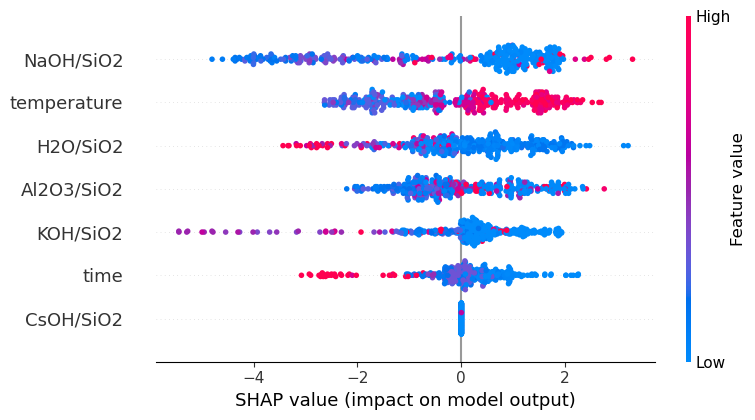

In [10]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 16]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="4")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="4")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="4")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="4")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="4")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="4")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK


# 6

,importance
Al2O3/SiO2,359.819220
H2O/SiO2,438.452515
NaOH/SiO2,551.576330
KOH/SiO2,549.288945
CsOH/SiO2,0.000000
temperature,366.583449
time,181.369479


,6,false
6,213,1
false,2,167


,6,false
6,81,11
false,14,59


正解率(Accuracy) : 訓練 0.9921671018276762, 検証 0.8484848484848485
適合率(Precision) : 訓練 0.9906976744186047, 検証 0.8526315789473684
再現率(Recall) : 訓練 0.9953271028037384, 検証 0.8804347826086957
F1スコア : 訓練 0.993006993006993, 検証 0.8663101604278075


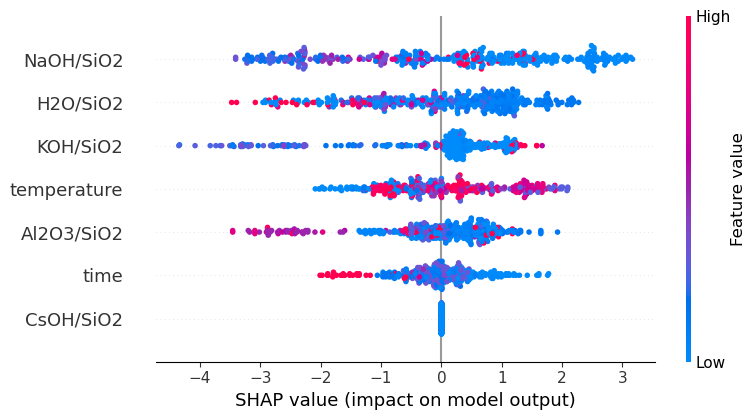

In [11]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 17]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="6")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="6")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="6")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="6")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="6")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="6")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK


# 8

,importance
Al2O3/SiO2,688.849882
H2O/SiO2,271.686559
NaOH/SiO2,254.341330
KOH/SiO2,505.659208
CsOH/SiO2,0.000000
temperature,387.118569
time,237.727707


,8,false
8,122,0
false,0,261


,8,false
8,38,15
false,12,100


正解率(Accuracy) : 訓練 1.0, 検証 0.8363636363636363
適合率(Precision) : 訓練 1.0, 検証 0.76
再現率(Recall) : 訓練 1.0, 検証 0.7169811320754716
F1スコア : 訓練 1.0, 検証 0.7378640776699029


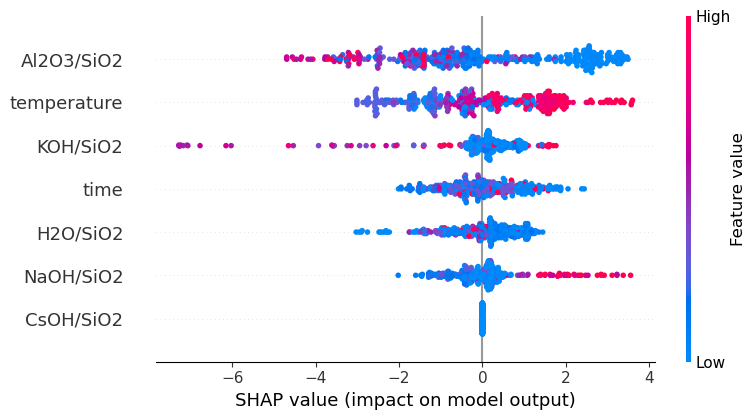

In [12]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 18]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="8")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="8")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="8")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="8")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="8")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="8")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK


# 5-1

,importance
Al2O3/SiO2,366.265507
H2O/SiO2,74.329539
NaOH/SiO2,375.365528
KOH/SiO2,609.684492
CsOH/SiO2,0.000000
temperature,208.641613
time,91.401567


,5-1,false
5-1,59,0
false,0,324


,5-1,false
5-1,25,0
false,2,138


正解率(Accuracy) : 訓練 1.0, 検証 0.9878787878787879
適合率(Precision) : 訓練 1.0, 検証 0.9259259259259259
再現率(Recall) : 訓練 1.0, 検証 1.0
F1スコア : 訓練 1.0, 検証 0.9615384615384616


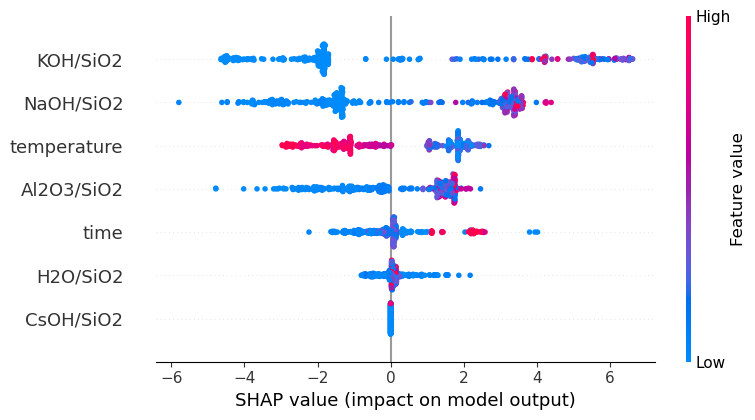

In [13]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 19]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="5-1")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="5-1")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="5-1")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="5-1")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="5-1")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="5-1")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK


# 4-2

,importance
Al2O3/SiO2,394.159922
H2O/SiO2,447.886109
NaOH/SiO2,150.496431
KOH/SiO2,658.249080
CsOH/SiO2,0.000000
temperature,488.274570
time,201.744478


,4-2,false
4-2,127,0
false,3,253


,4-2,false
4-2,44,11
false,7,103


正解率(Accuracy) : 訓練 0.9921671018276762, 検証 0.8909090909090909
適合率(Precision) : 訓練 0.9769230769230769, 検証 0.8627450980392157
再現率(Recall) : 訓練 1.0, 検証 0.8
F1スコア : 訓練 0.9883268482490273, 検証 0.8301886792452831


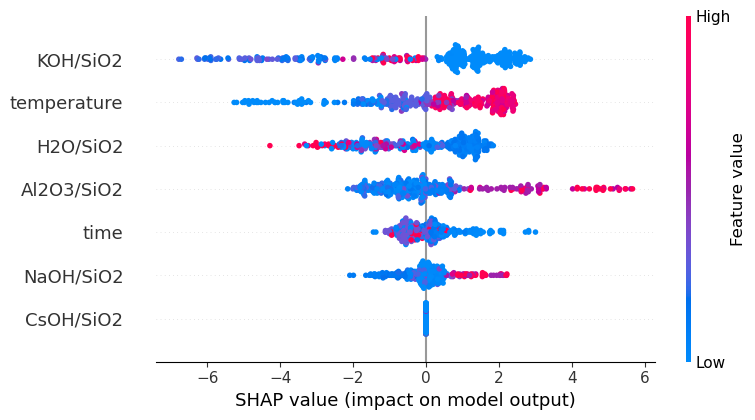

In [14]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 20]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="4-2")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="4-2")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="4-2")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="4-2")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="4-2")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="4-2")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK


# 6-2

,importance
Al2O3/SiO2,464.992306
H2O/SiO2,281.963361
NaOH/SiO2,408.687489
KOH/SiO2,496.414274
CsOH/SiO2,0.000000
temperature,347.133496
time,195.960390


,6-2,false
6-2,107,1
false,1,274


,6-2,false
6-2,36,10
false,11,108


正解率(Accuracy) : 訓練 0.9947780678851175, 検証 0.8727272727272727
適合率(Precision) : 訓練 0.9907407407407407, 検証 0.7659574468085106
再現率(Recall) : 訓練 0.9907407407407407, 検証 0.782608695652174
F1スコア : 訓練 0.9907407407407407, 検証 0.7741935483870968


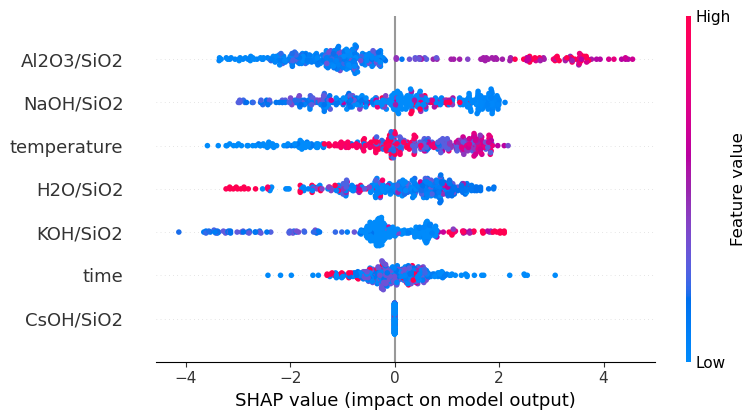

In [15]:
import pandas as pd
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 21]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=3)
import lightgbm as lgbm
model=lgbm.LGBMClassifier(importance_type = "gain")
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="6-2")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="6-2")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="6-2")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="6-2")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="6-2")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="6-2")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
import pandas as pd

# x_train が DataFrame でない場合は列名付きで変換
x_train = pd.DataFrame(x_train, columns=x.columns)  # ←重要！

explainer = shap.Explainer(model, x_train)  # 自動で LightGBM を判別
shap_values = explainer(x_train)            # Explanationオブジェクト

shap.summary_plot(shap_values.values, x_train)  # ← これでOK